# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on= ["Mouse ID","Mouse ID"])

# Display the data table for preview
study_results_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Checking the number of mice.
number_mice = len(study_results_complete['Mouse ID'].unique())
number_mice

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_results_complete[study_results_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_results = study_results_complete.drop(study_results_complete[study_results_complete['Mouse ID'] == 'g989'].index)
cleaned_study_results = pd.DataFrame(cleaned_study_results)
cleaned_study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Checking the number of mice in the clean DataFrame.
cleaned_study_results_number = len((cleaned_study_results)['Mouse ID'].unique())
cleaned_study_results_number


248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_results = cleaned_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_results = cleaned_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_results = cleaned_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_dev = cleaned_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_results = cleaned_study_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()



summary_stats =pd.DataFrame({
                            "Mean Tumor Volume":mean_results,
                            "Median Tumor Volume":median_results,
                            "Tumor Volume Variance":variance_results,
                            "Tumor Volume Std. Var.":standard_dev,
                            "Tummor Volume Std. Error":sem_results})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Var.,Tummor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

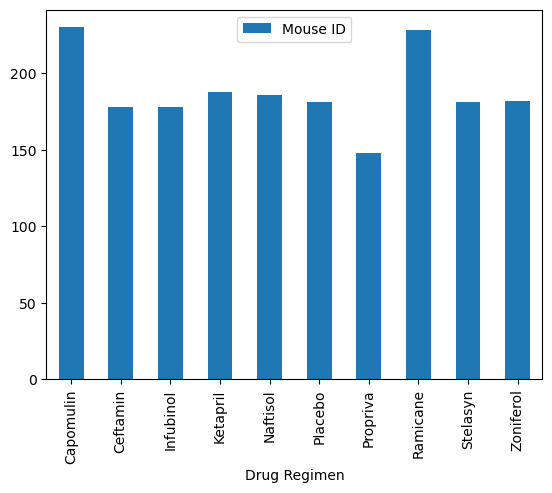

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_bar = pd.DataFrame(cleaned_study_results.groupby(['Drug Regimen'])['Mouse ID'].count())
panda_bar.plot(kind= 'bar')



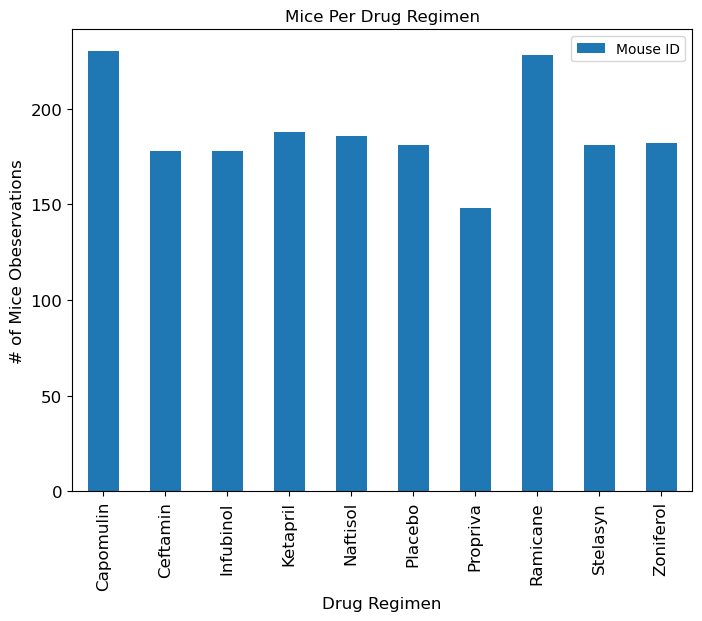

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt_bar = cleaned_study_results.groupby(['Drug Regimen'])['Mouse ID'].count().plot(kind='bar', title ="Mice Per Drug Regimen", figsize=(8, 6), legend=True, fontsize=12)
plt_bar.set_xlabel("Drug Regimen", fontsize=12)
plt_bar.set_ylabel("# of Mice Obeservations", fontsize=12)
plt.show()

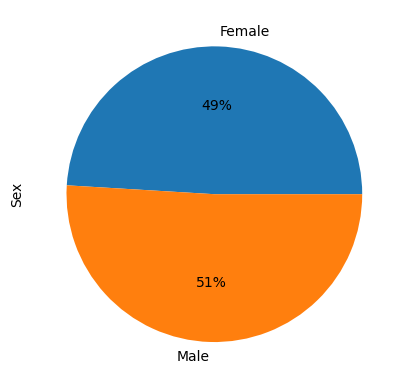

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_bar = pd.DataFrame(cleaned_study_results.groupby(['Sex'])['Sex'].count().plot(
    kind= 'pie' , subplots=True , autopct='%1.0f%%'
))


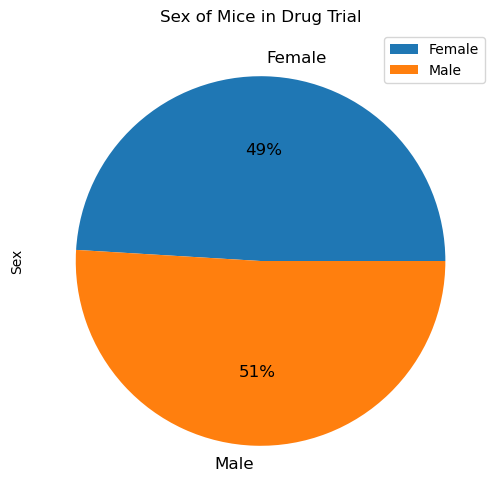

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = cleaned_study_results.groupby(['Sex'])['Sex'].count().plot(kind='pie', title ="Sex of Mice in Drug Trial", figsize=(8, 6), legend=True, fontsize=12, autopct='%1.0f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


top_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = cleaned_study_results[cleaned_study_results["Drug Regimen"].isin(top_drug)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(Final_Tumor_Size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_results_complete_top_drugs = pd.merge(cleaned_study_results, last_timepoint, how="left", on= ['Mouse ID', 'Mouse ID'])

study_results_complete_top_drugs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final_Tumor_Size
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,NaN


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
top_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [0]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in tumor_vol_data:
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
        lower_quartiles = last_timepoint.groupby(['Drug Regimen']).quantile(.25)
        upper_quartiles = last_timepoint.groupby(['Drug Regimen']).quantile(.75)
        iqr = upper_quartiles - lower_quartiles
        lower_bound = lower_quartiles - 1.5 * iqr
        upper_bound = upper_quartiles + 1.5 * iqr
        outliers = last_timepoint[(last_timepoint < lower_bound) | (last_timepoint > upper_bound)]
        print(f"The interquartile range is: {iqr}")
        print(f"The potential outliers are: {outliers}")
        
        
        
    
       
    # Determine outliers using upper and lower bounds

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomlin Treatment for Mouse l509')

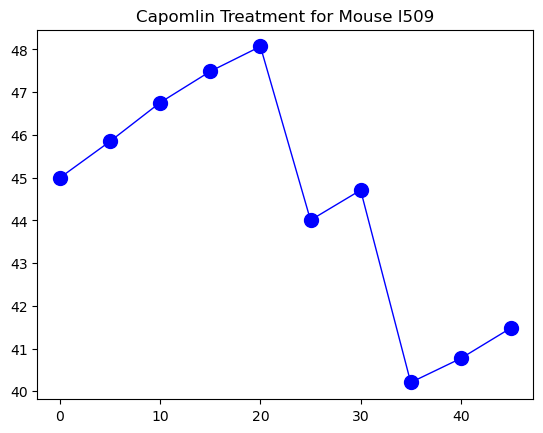

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_study_results[(cleaned_study_results['Mouse ID'] == 'l509')]
x_axis = capomulin_mouse['Timepoint']
y_axis = capomulin_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, linewidth = 1, markersize = 10, marker = 'o', color = 'blue')
plt.title('Capomlin Treatment for Mouse l509')

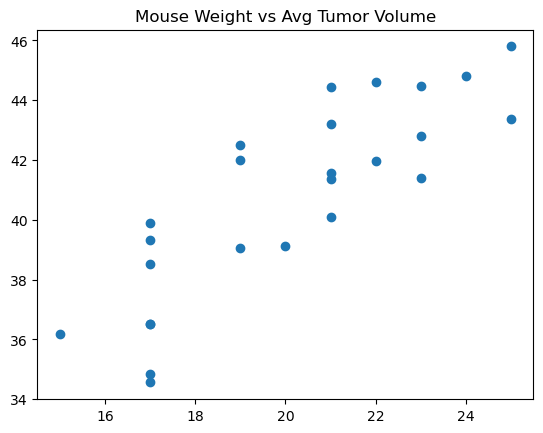

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin= cleaned_study_results[(cleaned_study_results['Drug Regimen'] == 'Capomulin')]
avg_mouse = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_mouse_weight = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.scatter(avg_mouse_weight, avg_mouse)


## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.841936342469472


Text(0, 0.5, 'Average Observed Tumor Volume')

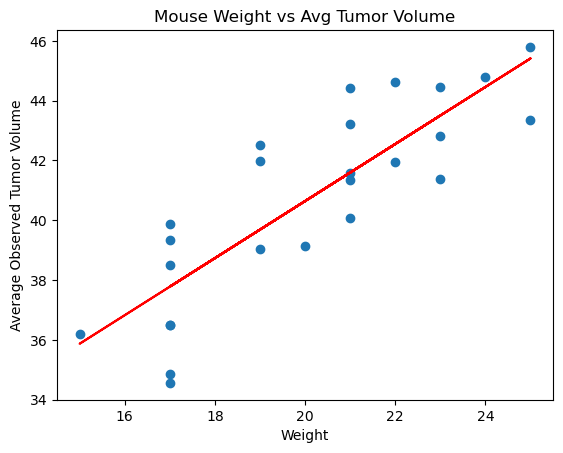

In [54]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_mouse, avg_mouse_weight)
print(f"The correlation coefficient between mouse weight and the average tumor volume is {correlation[0]}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_mouse_weight, avg_mouse)
regression = avg_mouse_weight * slope + intercept

plt.title("Mouse Weight vs Avg Tumor Volume")
plt.scatter(avg_mouse_weight, avg_mouse)
plt.plot(avg_mouse_weight, regression, color = 'red')
plt.xlabel('Weight')
plt.ylabel('Average Observed Tumor Volume')